In [54]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
from keras.models import *
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import os, shutil
import warnings
import random
import cv2
warnings.filterwarnings('ignore')

In [55]:
train_path = 'FloresNativas-sin-modificaciones/train'
validation_path = 'FloresNativas-sin-modificaciones/valid'
test_path = 'FloresNativas-sin-modificaciones/test'
train_path_ananuca = len(os.listdir('FloresNativas-sin-modificaciones/train/Ananuca/'))
train_path_azulillo = len(os.listdir('FloresNativas-sin-modificaciones/train/Azulillo/'))
train_path_chagual = len(os.listdir('FloresNativas-sin-modificaciones/train/Chagual/'))
train_path_chilco = len(os.listdir('FloresNativas-sin-modificaciones/train/Chilco/'))
train_path_copihue = len(os.listdir('FloresNativas-sin-modificaciones/train/Copihue/'))
validation_path_ananuca = len(os.listdir('FloresNativas-sin-modificaciones/valid/Ananuca/'))
validation_path_azulillo = len(os.listdir('FloresNativas-sin-modificaciones/valid/Azulillo/'))
validation_path_chagual = len(os.listdir('FloresNativas-sin-modificaciones/valid/Chagual/'))
validation_path_chilco = len(os.listdir('FloresNativas-sin-modificaciones/valid/Chilco/'))
validation_path_copihue = len(os.listdir('FloresNativas-sin-modificaciones/valid/Copihue/'))
test_path_ananuca = len(os.listdir('FloresNativas-sin-modificaciones/test/Ananuca/'))
test_path_azulillo = len(os.listdir('FloresNativas-sin-modificaciones/test/Azulillo/'))
test_path_chagual = len(os.listdir('FloresNativas-sin-modificaciones/test/Chagual/'))
test_path_chilco = len(os.listdir('FloresNativas-sin-modificaciones/test/Chilco/'))
test_path_copihue = len(os.listdir('FloresNativas-sin-modificaciones/test/Copihue/'))
image_categories = os.listdir('FloresNativas-sin-modificaciones/train')

print("NÚMERO TOTAL DE IMÁGENES A UTILIZAR : {}".format(train_path_ananuca + train_path_azulillo + train_path_chagual +train_path_chilco + train_path_copihue +
test_path_ananuca + test_path_azulillo + test_path_chagual +test_path_chilco + test_path_copihue + validation_path_ananuca + validation_path_azulillo + 
validation_path_chagual + validation_path_chilco + validation_path_copihue ))
print('-----------------------------------------------------')
print("SET DE IMÁGENES TOTALES PARA ENTRENAMIENTO : {}".format(train_path_ananuca + train_path_azulillo + train_path_chagual +train_path_chilco + train_path_copihue))
print('-----------------------------------------------------')
print("Set de imágenes de Añañuca para Entrenamiento  : {}".format(train_path_ananuca))
print("Set de imágenes de Azulillo para Entrenamiento : {}".format(train_path_azulillo))
print("Set de imágenes de Chagual para Entrenamiento  : {}".format(train_path_chagual))
print("Set de imágenes de Chilco para Entrenamiento   : {}".format(train_path_chilco))
print("Set de imágenes de Copihue para Entrenamiento  : {}".format(train_path_copihue))
print('-----------------------------------------------------')
print("Set de imágenes de Añañuca para Validación  : {}".format(validation_path_ananuca))
print("Set de imágenes de Azulillo para Validación : {}".format(validation_path_azulillo))
print("Set de imágenes de Chagual para Validación  : {}".format(validation_path_chagual))
print("Set de imágenes de Chilco para Validación   : {}".format(validation_path_chilco))
print("Set de imágenes de Copihue para Validación  : {}".format(validation_path_copihue))
print('-----------------------------------------------------')
print("Set de imágenes de Añañuca para Testing  : {}".format(test_path_ananuca))
print("Set de imágenes de Azulillo para Testing : {}".format(test_path_azulillo))
print("Set de imágenes de Chagual para Testing  : {}".format(test_path_chagual))
print("Set de imágenes de Chilco para Testing   : {}".format(test_path_chilco))
print("Set de imágenes de Copihue para Testing  : {}".format(test_path_copihue))
print('-----------------------------------------------------')


NÚMERO TOTAL DE IMÁGENES A UTILIZAR : 2750
-----------------------------------------------------
SET DE IMÁGENES TOTALES PARA ENTRENAMIENTO : 1925
-----------------------------------------------------
Set de imágenes de Añañuca para Entrenamiento  : 372
Set de imágenes de Azulillo para Entrenamiento : 393
Set de imágenes de Chagual para Entrenamiento  : 390
Set de imágenes de Chilco para Entrenamiento   : 394
Set de imágenes de Copihue para Entrenamiento  : 376
-----------------------------------------------------
Set de imágenes de Añañuca para Validación  : 115
Set de imágenes de Azulillo para Validación : 104
Set de imágenes de Chagual para Validación  : 104
Set de imágenes de Chilco para Validación   : 113
Set de imágenes de Copihue para Validación  : 114
-----------------------------------------------------
Set de imágenes de Añañuca para Testing  : 63
Set de imágenes de Azulillo para Testing : 53
Set de imágenes de Chagual para Testing  : 56
Set de imágenes de Chilco para Testing

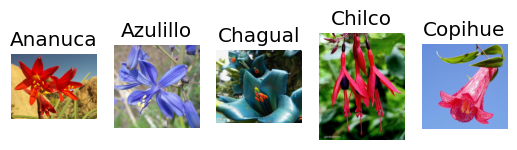

In [56]:
def plot_images(image_categories):

 # Create a figure
 plt.figure(figsize=(10, 10))
for i, cat in enumerate(image_categories):

 # Load images for the ith category

    image_path = train_path + '/' + cat
    images_in_folder = os.listdir(image_path)
    first_image_of_folder = images_in_folder[0]
    first_image_path = image_path + '/' + first_image_of_folder
    img = tf.keras.utils.load_img(first_image_path)
    img_arr = tf.keras.utils.img_to_array(img)/255.0


 # Create Subplot and plot the images
    plt.subplot(1, 5, i+1)
    plt.imshow(img_arr)
    plt.title(cat)
    plt.axis('off')

plt.show()


In [57]:
#MOSTRAR EJEMPLOS DE CADA CLASE

In [58]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_set = train_gen.flow_from_directory(
 train_path,
 target_size=(150, 150),
 batch_size=25,
 class_mode='categorical')


Found 1925 images belonging to 5 classes.


In [59]:
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_set = train_gen.flow_from_directory(
 validation_path,
 target_size=(150, 150),
 batch_size=25,
 class_mode='categorical')

Found 550 images belonging to 5 classes.


In [60]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_set = train_gen.flow_from_directory(
 test_path,
 target_size=(150, 150),
 batch_size=5,
 class_mode='categorical')

Found 275 images belonging to 5 classes.


In [61]:
class_map = dict([(v, k) for k, v in train_set.class_indices.items()])
print(class_map)

{0: 'Ananuca', 1: 'Azulillo', 2: 'Chagual', 3: 'Chilco', 4: 'Copihue'}


# MODELO DESDE CERO 

In [62]:
model = Sequential() # model object

In [63]:
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu',
input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

In [64]:
model.add(Flatten())

In [65]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 87616)             0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [67]:
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_set,
                 epochs=1,
                 verbose=1, 
                 validation_data=val_set,
                 steps_per_epoch = 1925//30,
                 validation_steps = 550//30,
                 callbacks=early_stopping)

64/64 [==============================] - 23s 354ms/step - loss: 1.0259 - accuracy: 0.6381 - val_loss: 0.4844 - val_accuracy: 0.8111


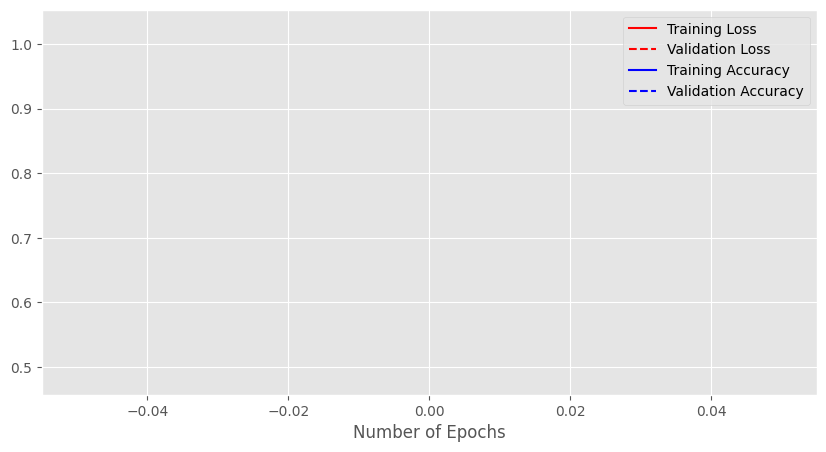

In [68]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [69]:
model.evaluate(test_set)

55/55 [==============================] - 1s 25ms/step - loss: 0.4646 - accuracy: 0.8073


[0.4645722508430481, 0.807272732257843]

1/1 [==============================] - 0s 66ms/step


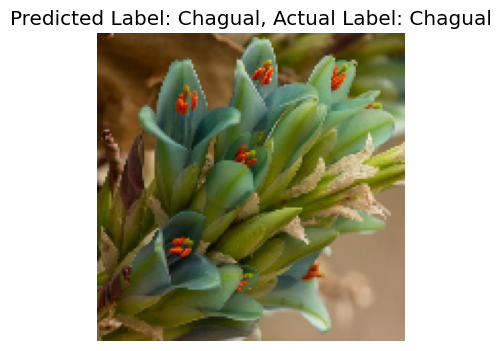

In [70]:
test_image_path = 'FloresNativas-sin-modificaciones/test/Chagual/Screenshot_435_png.rf.9a7a0fd04cdc261073a7eeae4d8051c3.jpg'
def generate_predictions(test_image_path, actual_label):
    
    #load and preprocess the image
    test_img = tf.keras.utils.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = tf.keras.utils.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1],test_img_arr.shape[2]))
    
    #Make predictions
    predicted_label = np.argmax(model.predict(test_img_input)) 
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()   
    
#Call the function
generate_predictions(test_image_path, actual_label='Chagual') 

# MODELO ResNet50

In [79]:
from tensorflow.keras.applications.resnet import ResNet50

resnet = ResNet50(include_top=False,
        weights='imagenet',
        input_shape=(150,150,3))
for layer in resnet.layers:
    layer.trainable = False
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
model.summary()
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics = ['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_9 (Flatten)         (None, 51200)             0         
                                                                 
 dense_17 (Dense)            (None, 5)                 256005    
                                                                 
Total params: 23,843,717
Trainable params: 256,005
Non-trainable params: 23,587,712
_________________________________________________________________


In [85]:
resnet_history = model.fit(train_set,epochs=5,validation_data=val_set)

Epoch 1/5
77/77 [==============================] - 60s 777ms/step - loss: 1.3412 - accuracy: 0.4551 - val_loss: 1.4908 - val_accuracy: 0.3509
Epoch 2/5
77/77 [==============================] - 57s 746ms/step - loss: 1.1662 - accuracy: 0.5319 - val_loss: 1.1954 - val_accuracy: 0.5109
Epoch 3/5
77/77 [==============================] - 66s 865ms/step - loss: 1.1431 - accuracy: 0.5382 - val_loss: 1.2080 - val_accuracy: 0.5164
Epoch 4/5
77/77 [==============================] - 59s 767ms/step - loss: 1.0032 - accuracy: 0.6088 - val_loss: 1.0315 - val_accuracy: 0.6018
Epoch 5/5
77/77 [==============================] - 59s 769ms/step - loss: 0.9697 - accuracy: 0.6327 - val_loss: 1.0190 - val_accuracy: 0.6364


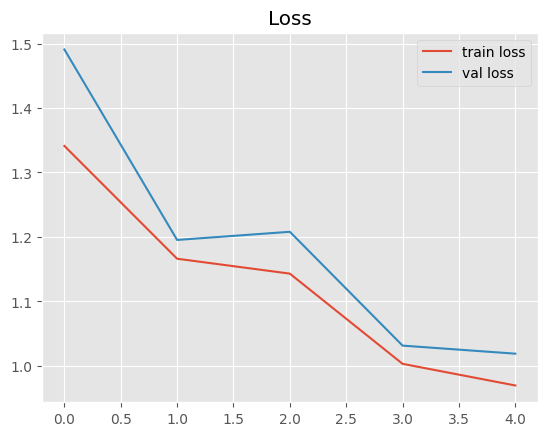

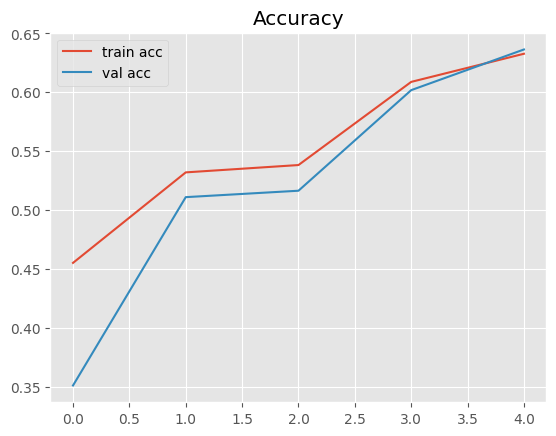

In [86]:
plt.plot(resnet_history.history['loss'], label='train loss')
plt.plot(resnet_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')


plt.plot(resnet_history.history['accuracy'], label='train acc')
plt.plot(resnet_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [87]:
resnet_auc = model.evaluate(test_set)

55/55 [==============================] - 7s 127ms/step - loss: 0.9231 - accuracy: 0.6400


55/55 [==============================] - 7s 128ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

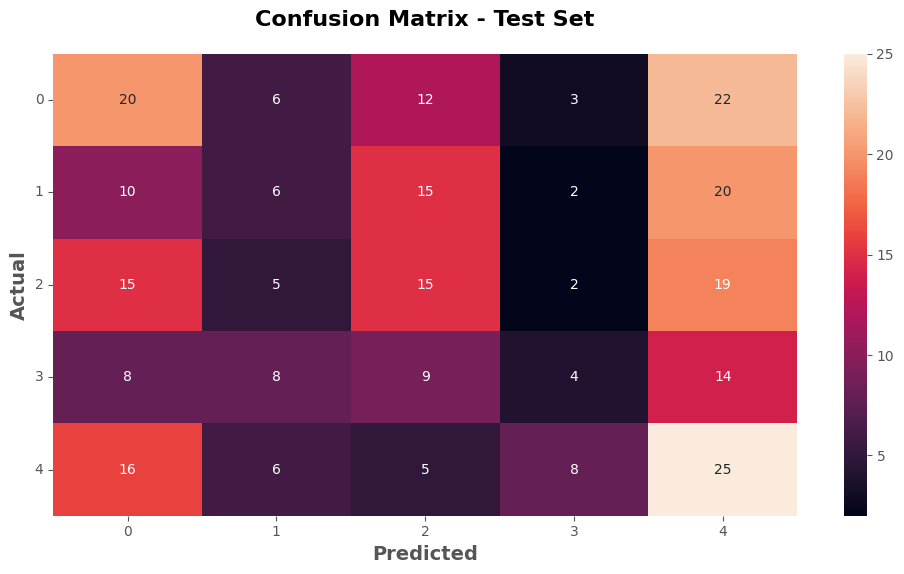

In [88]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
 test_labels,
 test_pred,
 num_classes=None,
 weights=None,
 dtype=tf.dtypes.int32,
 name=None,
),annot = True,
 fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.29      0.32      0.30        63
           1       0.19      0.11      0.14        53
           2       0.27      0.27      0.27        56
           3       0.21      0.09      0.13        43
           4       0.25      0.42      0.31        60

    accuracy                           0.25       275
   macro avg       0.24      0.24      0.23       275
weighted avg       0.25      0.25      0.24       275



# COMPARACIÓN DE LOS MODELOS